In [1]:
install.packages(c("pwr", "powerSurvEpi"), repos = "http://cran.us.r-project.org")

Installing packages into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'pwr' successfully unpacked and MD5 sums checked
package 'powerSurvEpi' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\Rtmpakptij\downloaded_packages


In [23]:
library(pwr)

Warning message:
"package 'pwr' was built under R version 3.4.4"

## Power of a t-test

Recall that one use of the t-test is used to test for diﬀerences between two sample means, drawn from two Normal populations with unknown variance. The null hypothesis is that the samples were drawn from a single population. i.e. H0: the sample means are not diﬀerent. 

In [5]:
power.t.test(n=6, delta=0.2, sig.level=0.05, sd=.1, power=NULL)


     Two-sample t test power calculation 

              n = 6
          delta = 0.2
             sd = 0.1
      sig.level = 0.05
          power = 0.8764176
    alternative = two.sided

NOTE: n is number in *each* group


Note that we have left the sig.level argument at its default (0.05). We have speciﬁed the sample size, and the two arguments that contribute to the eﬀect size (delta, the diﬀerence between the means and sd, the common standard deviation. More on eﬀect sizes below). power was set to NULL, as this is the value we are trying to compute. The output is printed, including the estimated power (0.88 in this case).


### Increasing sample size

In [9]:
power.t.test(n=8, delta=0.2, sig.level=0.05, sd=.1, power=NULL)
power.t.test(n=10, delta=0.2, sig.level=0.05, sd=.1, power=NULL)
power.t.test(n=12, delta=0.2, sig.level=0.05, sd=.1, power=NULL)


     Two-sample t test power calculation 

              n = 8
          delta = 0.2
             sd = 0.1
      sig.level = 0.05
          power = 0.9602208
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 10
          delta = 0.2
             sd = 0.1
      sig.level = 0.05
          power = 0.988179
    alternative = two.sided

NOTE: n is number in *each* group



     Two-sample t test power calculation 

              n = 12
          delta = 0.2
             sd = 0.1
      sig.level = 0.05
          power = 0.9966948
    alternative = two.sided

NOTE: n is number in *each* group


## Power of one-way-ANOVA

H0: the mean (average value of the dependent variable) is the same for all groups.  
H1: mean is not the same for all groups

In [20]:
power.anova.test(groups=4, n=NULL, within.var=5, between.var=3, sig.level=0.05, power = 0.85)
power.anova.test(groups=4, n=NULL, within.var=5, between.var=3, sig.level=0.05, power = 0.90)
power.anova.test(groups=4, n=NULL, within.var=5, between.var=3, sig.level=0.05, power = 0.95)


     Balanced one-way analysis of variance power calculation 

         groups = 4
              n = 7.885821
    between.var = 3
     within.var = 5
      sig.level = 0.05
          power = 0.85

NOTE: n is number in each group



     Balanced one-way analysis of variance power calculation 

         groups = 4
              n = 8.91936
    between.var = 3
     within.var = 5
      sig.level = 0.05
          power = 0.9

NOTE: n is number in each group



     Balanced one-way analysis of variance power calculation 

         groups = 4
              n = 10.57814
    between.var = 3
     within.var = 5
      sig.level = 0.05
          power = 0.95

NOTE: n is number in each group


## Power of correlation test

H0: true correlation coefficient ρ is equal to 0  
H1: ρ ≠ 0

In [27]:
pwr.r.test(n = 10, r = 0.80, sig.level = 0.05, power = NULL)


     approximate correlation power calculation (arctangh transformation) 

              n = 10
              r = 0.8
      sig.level = 0.05
          power = 0.8541282
    alternative = two.sided


### How large the sample size needs to be?

In [29]:
pwr.r.test(n = NULL, r = 0.80, sig.level = 0.05, power = 0.85)
pwr.r.test(n = NULL, r = 0.60, sig.level = 0.05, power = 0.85)
pwr.r.test(n = NULL, r = 0.40, sig.level = 0.05, power = 0.85)


     approximate correlation power calculation (arctangh transformation) 

              n = 9.912283
              r = 0.8
      sig.level = 0.05
          power = 0.85
    alternative = two.sided



     approximate correlation power calculation (arctangh transformation) 

              n = 20.9763
              r = 0.6
      sig.level = 0.05
          power = 0.85
    alternative = two.sided



     approximate correlation power calculation (arctangh transformation) 

              n = 52.1998
              r = 0.4
      sig.level = 0.05
          power = 0.85
    alternative = two.sided


The lower the population correlation, the higher sample size we require to attain a good power!

## Effect Size

Increasing the eﬀect size (the standardised “diﬀerence”between treatment groups) results in an increased power. However, calculation of eﬀect sizes varies from test to test, depending on the underlying distribution of the test statistic.   
  
In the absence of pilot data, Cohen (1988) provides standard measures of eﬀect size, classiﬁed as "small", "medium", and "large" for a variety of tests. These eﬀect sizes are built into the `pwr` package, using the function `cohen.ES`. Although these "standard" eﬀect sizes are somewhat arbitrary, they can provide a ﬁrst guide for sample size estimation. 

In [30]:
cohen.ES(test="r", size="small")
cohen.ES(test="r", size="medium")
cohen.ES(test="r", size="large")


     Conventional effect size from Cohen (1982) 

           test = r
           size = small
    effect.size = 0.1



     Conventional effect size from Cohen (1982) 

           test = r
           size = medium
    effect.size = 0.3



     Conventional effect size from Cohen (1982) 

           test = r
           size = large
    effect.size = 0.5


In [31]:
cohen.ES(test="chisq", size="small")
cohen.ES(test="chisq", size="medium")
cohen.ES(test="chisq", size="large")


     Conventional effect size from Cohen (1982) 

           test = chisq
           size = small
    effect.size = 0.1



     Conventional effect size from Cohen (1982) 

           test = chisq
           size = medium
    effect.size = 0.3



     Conventional effect size from Cohen (1982) 

           test = chisq
           size = large
    effect.size = 0.5


### How large the sample size needs to be?

In [34]:
pwr.chisq.test(w = 0.1, N = NULL, df = 3, sig.level = 0.05, power = 0.8)
pwr.chisq.test(w = 0.3, N = NULL, df = 3, sig.level = 0.05, power = 0.8)
pwr.chisq.test(w = 0.5, N = NULL, df = 3, sig.level = 0.05, power = 0.8)


     Chi squared power calculation 

              w = 0.1
              N = 1090.256
             df = 3
      sig.level = 0.05
          power = 0.8

NOTE: N is the number of observations



     Chi squared power calculation 

              w = 0.3
              N = 121.1396
             df = 3
      sig.level = 0.05
          power = 0.8

NOTE: N is the number of observations



     Chi squared power calculation 

              w = 0.5
              N = 43.61025
             df = 3
      sig.level = 0.05
          power = 0.8

NOTE: N is the number of observations


## Power Curves

### t-test: vary delta and n 

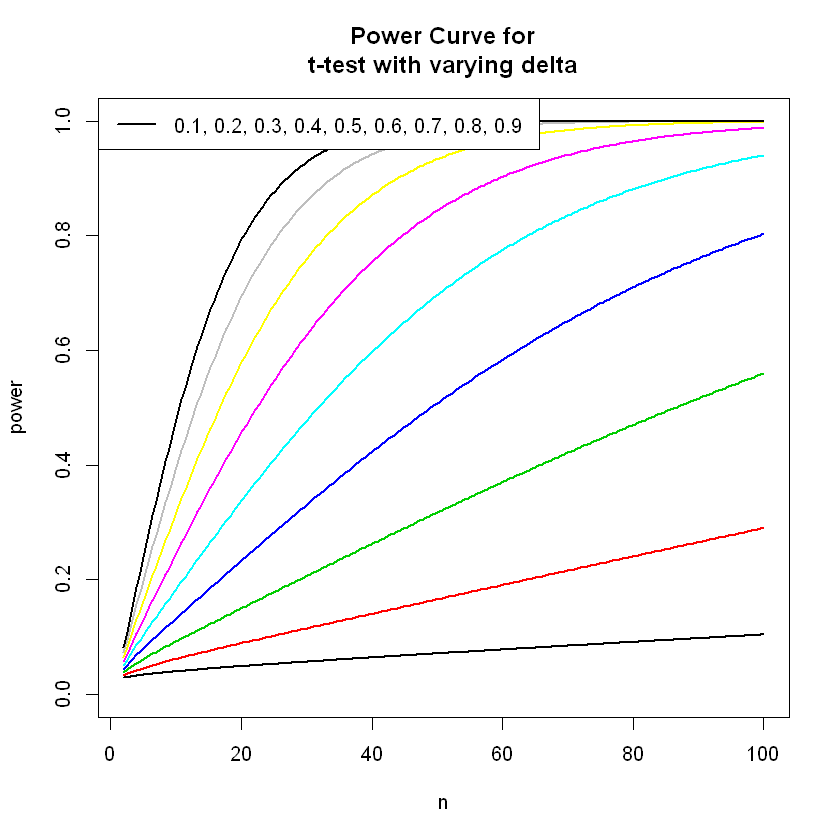

In [43]:
nvals <- seq(2, 100, length.out=200)

deltas <- c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9) 

plot(nvals, seq(0,1, length.out=length(nvals)), xlab="n", ylab="power", main="Power Curve for\nt-test with varying delta", type="n") 

for (i in 1:length(deltas)) { 
    powvals <- sapply(nvals, function (x) power.t.test(n=x, delta=deltas[i])$power) 
    lines(nvals, powvals, lwd=2, col=i) 
}
                      
legend("topleft", lwd=2, col=1:length(deltas), legend=toString(deltas))


### anova: vary between-group variance and n 

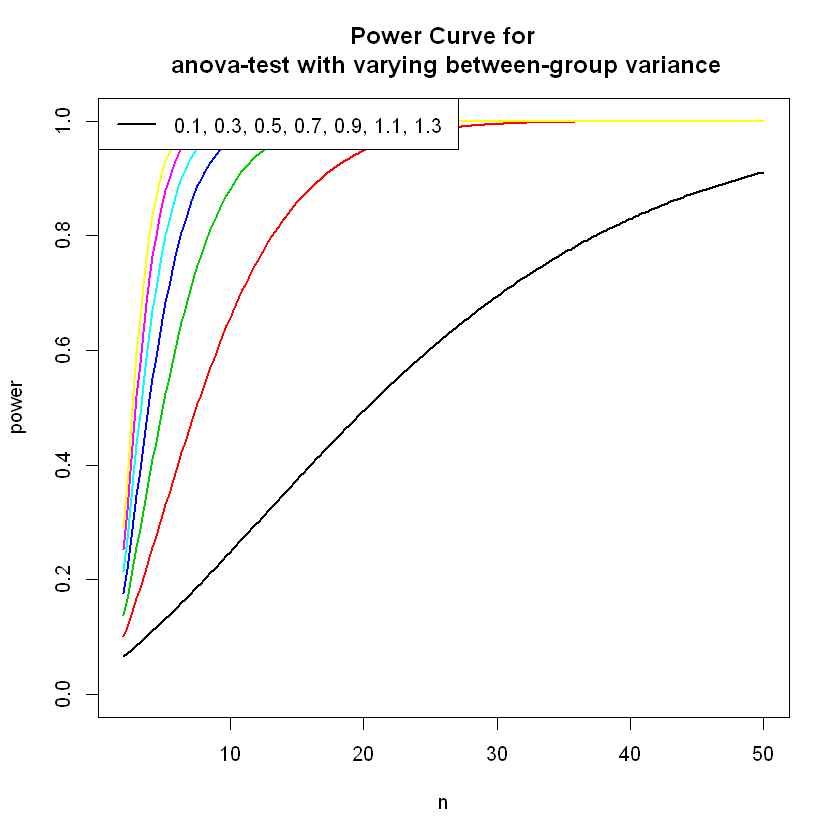

In [45]:
nvals <- seq(2, 50, length.out=200)

vars <- c(0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3) 

plot(nvals, seq(0,1, length.out=length(nvals)), xlab="n", ylab="power", main="Power Curve for\n anova-test with varying between-group variance", type="n") 

for (i in 1:length(vars)) { 
    powvals <- sapply(nvals, function (x) power.anova.test(groups=4, n=x, between.var=vars[i], within.var=1, sig.level=0.05)$power) 
    lines(nvals, powvals, lwd=2, col=i) 
}
                      
legend("topleft", lwd=2, col=1:length(vars), legend=toString(vars))

## Cox regression

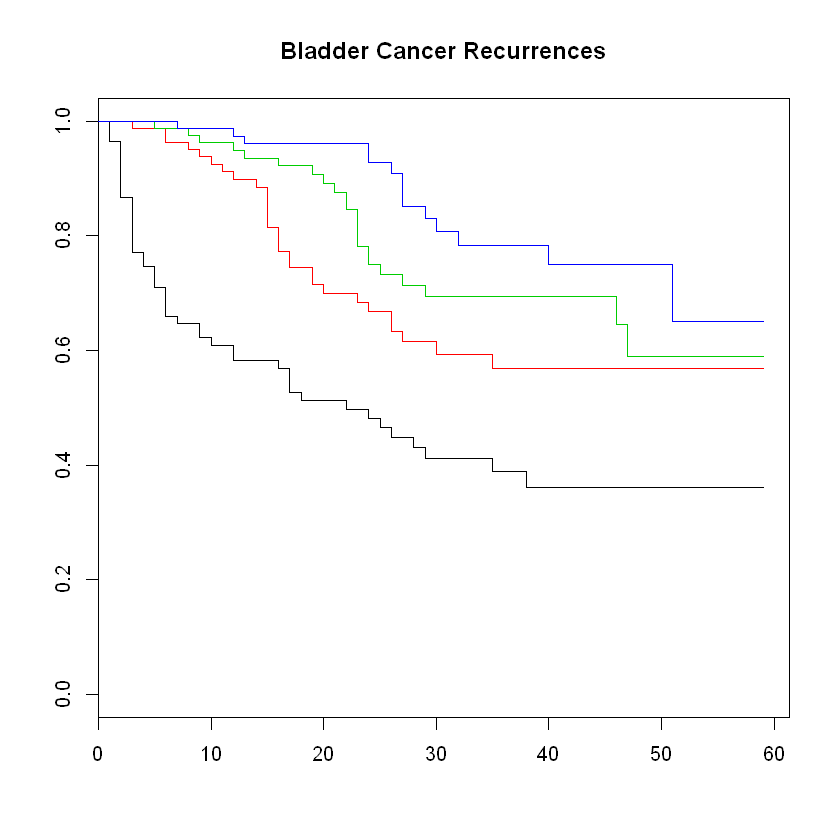

In [48]:
library(survival) 
tst <-coxph(Surv(stop, event) ~ strata(enum), bladder)
plot(survfit(tst), col=1:4, main="Bladder Cancer Recurrences", mark.time=FALSE)

In [49]:
library(powerSurvEpi) 
bl2 <- bladder[bladder$enum==1|bladder$enum==2,] 
bl2$enum2 <- ifelse(bl2$enum==1, "C", "E") 
bl3 <- bl2[,c("stop", "event", "enum2")] 
PCT100 <- powerCT(Surv(stop, event)~enum2, dat=bl3, nE=100, nC=100, RR=1.6) 
print(PCT100$power)

Warning message:
"package 'powerSurvEpi' was built under R version 3.4.4"

[1] 0.7507715


In [50]:
PCT150 <- powerCT(Surv(stop, event)~enum2, dat=bl3, nE=150, nC=150, RR=1.6) 
print(PCT150$power)

[1] 0.8978767
